In [12]:
import bs4
import urllib.request as url

In [30]:
http = url.urlopen('https://www.imdb.com/title/tt2631186/reviews?ref_=tt_ql_3')

In [31]:
http

In [32]:
page = bs4.BeautifulSoup(http)

In [33]:
t = page.find('a',class_='title')

In [34]:
print(t.text)

 Baahubali is Indian Grand Spectacle



In [35]:
titles = page.find_all('a',class_='title')

In [44]:
titleText = []
for item in titles:
    titleText.append(item.text)

In [37]:
spanList = page.find_all('span', class_='rating-other-user-rating')

In [38]:
spanList[0].find('span').text

'8'

In [39]:
ratings = []
for i in range(len(spanList)):
    ratings.append(float(spanList[i].find('span').text))

In [40]:
ratings

[8.0,
 9.0,
 10.0,
 8.0,
 10.0,
 10.0,
 9.0,
 10.0,
 10.0,
 5.0,
 10.0,
 3.0,
 10.0,
 10.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0]

In [47]:
data = {
    "reviews":titleText,
    "ratings":ratings
}

In [48]:
import pandas as pd

In [50]:
df = pd.DataFrame(data)

In [51]:
df.head()

,reviews,ratings
0,Baahubali is Indian Grand Spectacle\n,8.0
1,A new bench mark for Indian Cinema!!!\n,9.0
2,A superb visual treat.\n,10.0
3,This one is a Visual Wonder!\n,8.0
4,Baahubali...(An Indian - Hollywood movie) Pro...,10.0


In [55]:
df[df['ratings'] == 10.0]

,reviews,ratings
2,A superb visual treat.\n,10.0
4,Baahubali...(An Indian - Hollywood movie) Pro...,10.0
5,Rajamouli leaves his mark.. conclusion awaits\n,10.0
7,Just don't miss this one\n,10.0
8,evidence for improvement in standards for Ind...,10.0
10,Awestuck\n,10.0
12,This is not Sparta!! This is Bahubali !!!!! E...,10.0
13,Beginning of the real Indian cinema\n,10.0


In [56]:
import matplotlib.pyplot as plt

(array([10.,  0.,  2.,  0.,  1.,  0.,  0.,  2.,  2.,  8.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

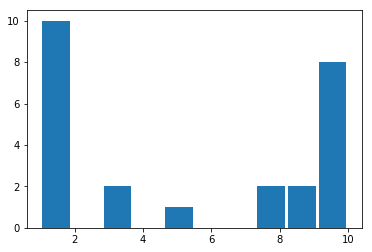

In [58]:
plt.hist(df['ratings'], rwidth=0.9)

In [59]:
pd.value_counts(df['ratings'])

1.0     10
10.0     8
3.0      2
9.0      2
8.0      2
5.0      1
Name: ratings, dtype: int64

In [62]:
x = [8,2,2,1,2,10]
labels = [10.0,8.0,9.0,5.0,3.0,1.0]

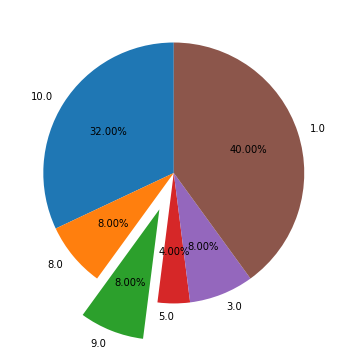

In [71]:
plt.figure(figsize=(10,6))
plt.pie(x, labels=labels, startangle=90, autopct='%1.2f%%', explode=[0,0,0.30,0,0,0])
plt.show()